In [1]:
from pathlib import Path
import menpo.io as mio
from menpo.visualize import print_progress

path_to_lfpw = Path('lfpw/')

def preprocess_img(img):
    img = img.crop_to_landmarks_proportion(0.1)
    if img.n_channels == 3:
        img = img.as_greyscale(mode='luminosity')
    return img

training_images = [preprocess_img(i) for i in mio.import_images(path_to_lfpw / 'trainset', verbose=True)]

Found 811 assets, index the returned LazyList to import.


In [2]:
import time
from menpofit.sdm import SupervisedDescentFitter, NonParametricNewton
start = time.time()
fitter = SupervisedDescentFitter(training_images,
                                 sd_algorithm_cls=NonParametricNewton,
                                 verbose=True)
end = time.time()
print(end - start)
print(fitter)

- Computing reference shape                                                     Computing batch 0
- Generating 30 new bounding boxes directly from the ground truth shape: [==========] 100% (811/811) - done.00 remaining
  - Scale 0: (Iteration 0) - Training error -> mean: 0.0258, std: 0.0141, median: 0.0225.maining00 remaining
  - Scale 0: (Iteration 1) - Training error -> mean: 0.0067, std: 0.0034, median: 0.0060.maining
  - Scale 1: (Iteration 0) - Training error -> mean: 0.0022, std: 0.0012, median: 0.0020.mainingne.remaining
  - Scale 1: (Iteration 1) - Training error -> mean: 0.0009, std: 0.0004, median: 0.0008.maining
650.9259939193726
Supervised Descent Method
 - Regression performed using the NonParametricNewton algorithm
   - Regression class: IRLRegression
 - Perturbations generated per shape: 30
 - Images scaled to diagonal: 241.43
 - Custom perturbation scheme used: False
 - Scales: [0.5, 1.0]
   - Scale 0.5
     - 2 iterations
     - Patch shape: (17, 17)
     - Holistic fe

In [3]:
import pickle
with open('sdf_fitter.pkl', 'wb') as f:
    pickle.dump(fitter, f)

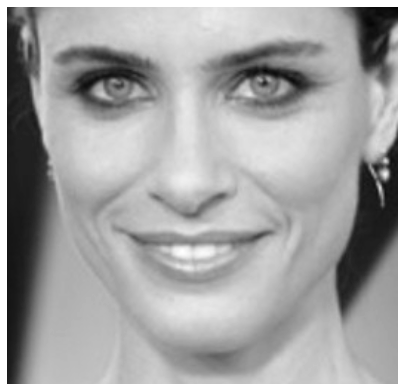

In [4]:
import matplotlib.pyplot as plt
test_img = preprocess_img(mio.import_image(Path('./lfpw/trainset/image_0004.png')))
test_img.view()

In [5]:
from menpodetect.dlib.detect import DlibDetector
import dlib
ff_detector = dlib.get_frontal_face_detector()
bboxes = DlibDetector(ff_detector)(test_img, greyscale=True)

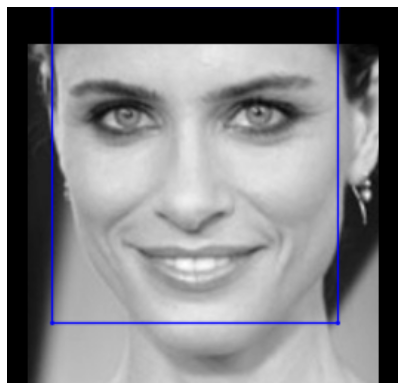

In [6]:
test_img.rasterize_landmarks(group='dlib_0').view()

In [8]:
start = time.time()
fr = fitter.fit_from_bb(test_img, bboxes[0], max_iters=100)
end = time.time()
print(end - start)

0.012204885482788086


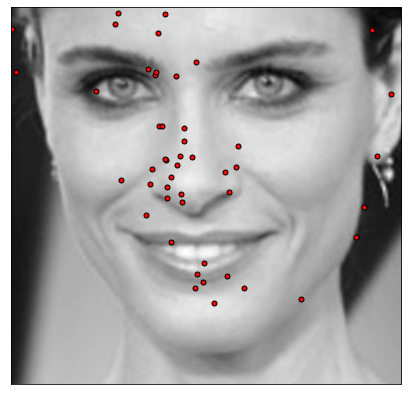

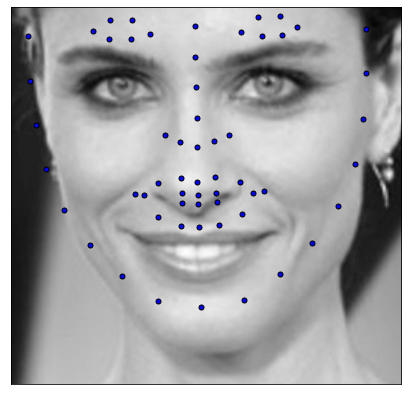

In [18]:
fr.image.view(new_figure=True);
fr.final_shape.view();

fr.image.view(new_figure=True);
fr.initial_shape.view(marker_face_colour='blue');